For the ***interactive*** plots where you can hover over the points to see the movie titles, please refer to: [https://colab.research.google.com/drive/15T8B0m_wUASy1wWE4hi4MmLZZPtO51eS?usp=sharing](https://colab.research.google.com/drive/15T8B0m_wUASy1wWE4hi4MmLZZPtO51eS?usp=sharing)

**1)** Loading libraries for:

- Data handling (`pandas`, `numpy`)
- Visualization (`matplotlib`, `seaborn`, `plotly`)
- Statistical testing (`scipy`)
- Machine learning models (`RandomForestRegressor`, `LinearRegression`, etc.)
- Model evaluation metrics (`mean_squared_error`, `r2_score`)


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import scipy.stats as stats
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

**2)** Loading, cleaning and preprocessing the dataset

In [12]:
df = pd.read_csv("movies_after_2000_final.csv")

df = df.rename(columns={
    'Budget (USD)': 'Budget',
    'Revenue (USD)': 'Revenue',
    'IMDb Rating': 'Rating',
    'Genre': 'Genre'
})
df = df.dropna(subset=['Budget', 'Revenue', 'Rating', 'Genre'])
df = df[df['Genre'].str.lower() != 'western'] #excluded the "western" genre since it having very few movies led to incorrect analysis

#calculate the return on investment to measure whether the outcome (revenue) was worth the expenses (budget)
df['ROI'] = (df['Revenue'] - df['Budget']) / df['Budget']

**3)** Scatter plots with trend lines & initial hypothesis testings

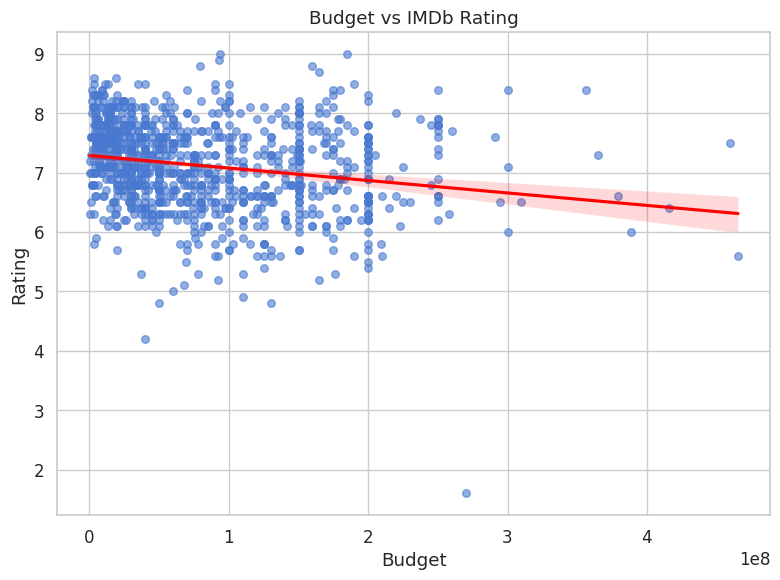

Alternative Hypothesis: Budget affects IMDb rating.
Correlation: r = -0.21, p = 4.03e-11
✅ Conclusion: IMDb rating decreases as budget increases to huge numbers.
 


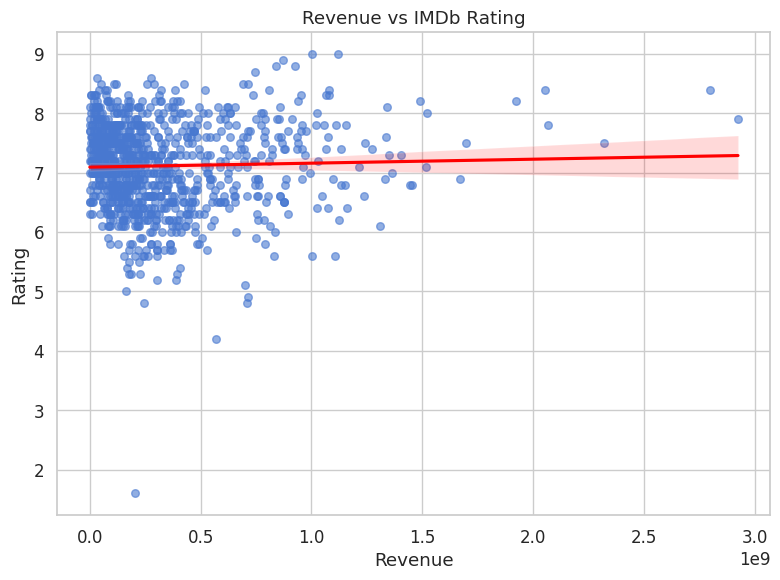

Alternative Hypothesis: Revenue affects IMDb rating.
Correlation: r = 0.03, p = 3.27e-01
❌ No significant evidence found.
 


In [13]:
def plot_static_scatter(x, y, title):
    plt.figure(figsize=(8, 6))
    sns.regplot(data=df, x=x, y=y, scatter_kws={'alpha':0.6, 's':30}, line_kws={"color": "red"})
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

# budget vs rating scatter plot
plot_static_scatter("Budget", "Rating", "Budget vs IMDb Rating")
corr, pval = stats.pearsonr(df["Budget"], df["Rating"])
print("Alternative Hypothesis: Budget affects IMDb rating.")
print(f"Correlation: r = {corr:.2f}, p = {pval:.2e}")
print("✅ Conclusion: IMDb rating decreases as budget increases to huge numbers." if pval < 0.05 else "❌ No significant evidence found.")
print(" ")

# revenue vs rating scatter plot
plot_static_scatter("Revenue", "Rating", "Revenue vs IMDb Rating")
corr, pval = stats.pearsonr(df["Revenue"], df["Rating"])
print("Alternative Hypothesis: Revenue affects IMDb rating.")
print(f"Correlation: r = {corr:.2f}, p = {pval:.2e}")
print("✅ Conclusion: Revenue significantly affects IMDb rating." if pval < 0.05 else "❌ No significant evidence found.")
print(" ")

**4)** Bar charts by genre and initial ANOVA tests

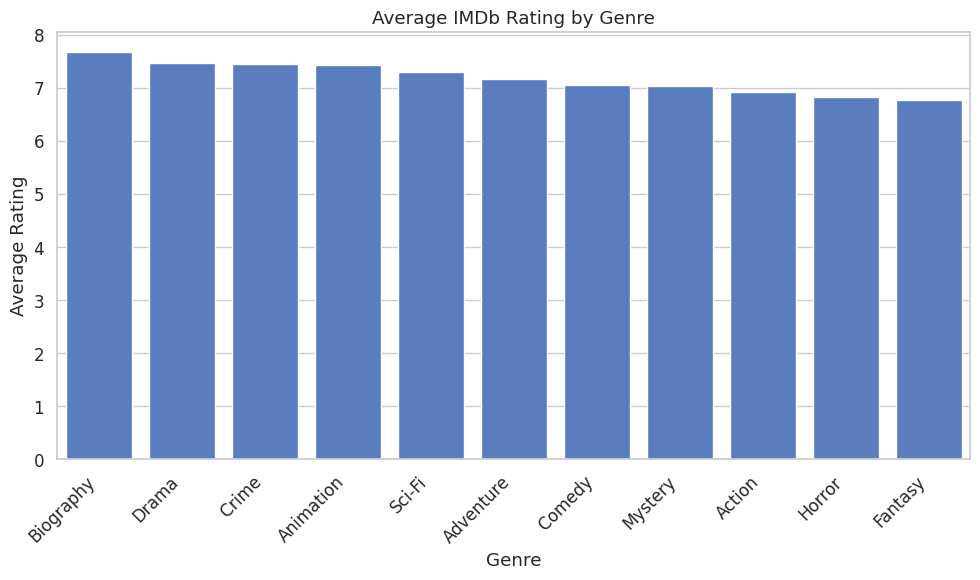

ANOVA for Rating by Genre — F = 13.57, p = 1.38e-22
✅ Rating among genres differs significantly.
 


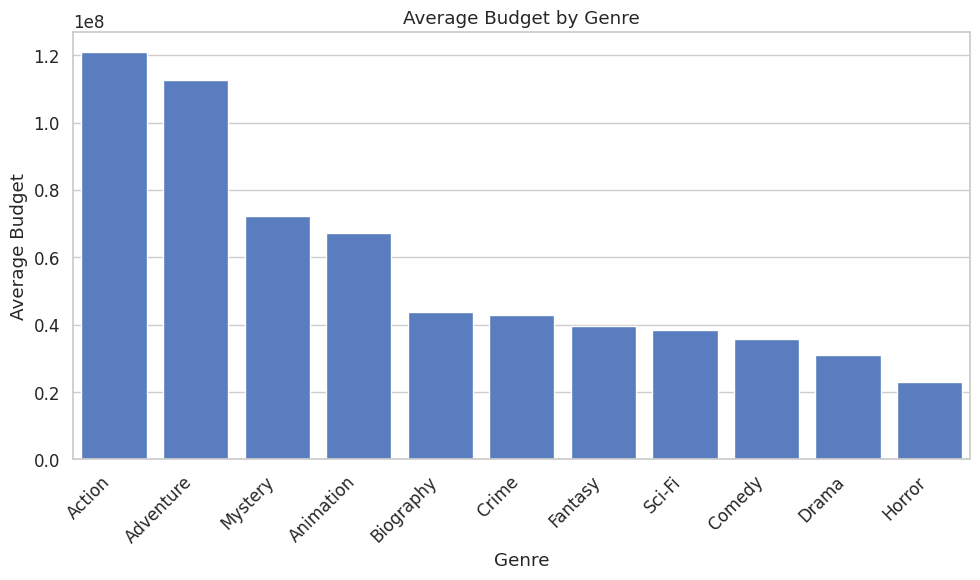

ANOVA for Budget by Genre — F = 49.59, p = 1.74e-80
✅ Budget among genres differs significantly.
 


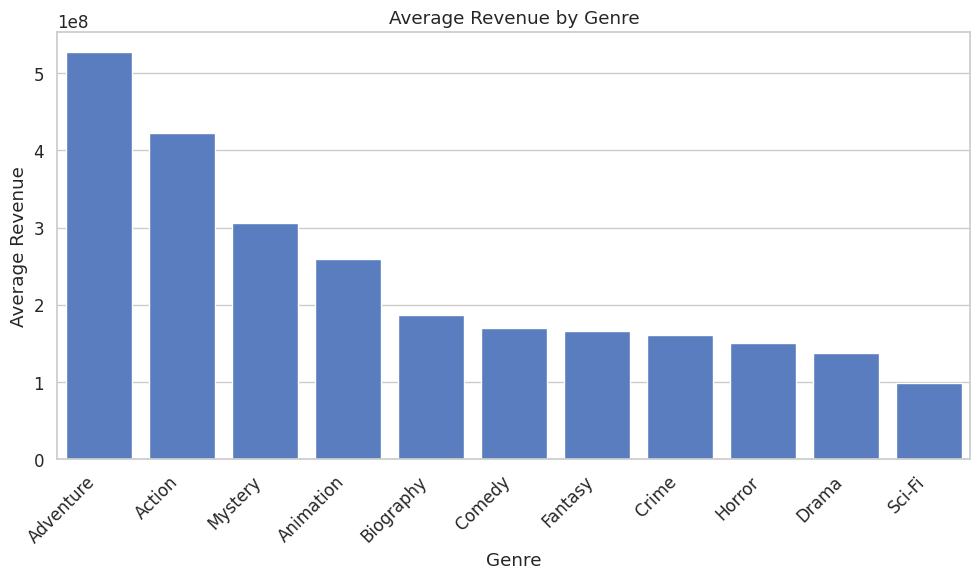

ANOVA for Revenue by Genre — F = 22.42, p = 4.08e-38
✅ Revenue among genres differs significantly.
 


In [14]:
def genre_bar_static(metric, ylabel, title):
    genre_means = df.groupby("Genre", observed=False)[metric].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=genre_means.index, y=genre_means.values)
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Genre")
    plt.tight_layout()
    plt.show()

    # ANOVA
    groups = [group[metric].values for _, group in df.groupby("Genre", observed=False)]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"ANOVA for {metric} by Genre — F = {f_stat:.2f}, p = {p_val:.2e}")
    print("✅", metric, "among genres differs significantly." if p_val < 0.05 else "❌ No significant genre-based differences.")
    print(" ")

genre_bar_static("Rating", "Average Rating", "Average IMDb Rating by Genre")
genre_bar_static("Budget", "Average Budget", "Average Budget by Genre")
genre_bar_static("Revenue", "Average Revenue", "Average Revenue by Genre")